HUMAN ACTION DETECTION

In [ ]:
#import data handling & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#preprocessing import libraries
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
#ML models
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df= pd.read_csv('/content/mhealth_raw_data.csv')

In [ ]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.01030,0.034483,0.0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.01030,0.034483,0.0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.01030,0.034483,0.0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.00820,0.025862,0.0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.00820,0.025862,0.0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23824,2.1399,-9.8306,1.10280,-0.222630,-0.92120,-0.44008,-8.1248,-5.7758,9.419500,-1.02750,0.01232,0.325430,0.0,subject1
23825,1.6534,-10.3670,0.89400,-0.222630,-0.92120,-0.44008,-9.0704,-4.0132,8.684800,-1.03920,0.01232,0.260780,0.0,subject1
23826,1.9576,-10.2800,-0.23399,-0.244900,-0.92683,-0.47741,-7.6599,-1.9103,7.967000,-1.03920,0.01232,0.260780,0.0,subject1
23827,3.2124,-10.1800,-0.16437,-0.244900,-0.92683,-0.47741,-6.8291,-0.6249,8.510400,-1.03920,0.01232,0.260780,0.0,subject1


In [ ]:
df.shape

(23829, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23829 entries, 0 to 23828
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alx       23829 non-null  float64
 1   aly       23829 non-null  float64
 2   alz       23829 non-null  float64
 3   glx       23829 non-null  float64
 4   gly       23829 non-null  float64
 5   glz       23828 non-null  float64
 6   arx       23828 non-null  float64
 7   ary       23828 non-null  float64
 8   arz       23828 non-null  float64
 9   grx       23828 non-null  float64
 10  gry       23828 non-null  float64
 11  grz       23828 non-null  float64
 12  Activity  23828 non-null  float64
 13  subject   23828 non-null  object 
dtypes: float64(13), object(1)
memory usage: 2.5+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,23829.0,1.772987,2.025441,-21.73100,0.495490,2.038900,2.655900,19.99300
aly,23829.0,-7.592997,4.630241,-19.54800,-9.732900,-9.568100,-9.056000,20.89000
alz,23829.0,1.746541,4.117693,-19.26000,0.276900,0.662170,1.302200,23.88100
glx,23829.0,0.029941,0.389065,-0.84045,-0.222630,-0.033395,0.402600,0.82560
gly,23829.0,-0.550959,0.582006,-1.08630,-0.876170,-0.848030,-0.694180,0.74109
glz,23828.0,-0.293218,0.426556,-1.13750,-0.542240,-0.504910,0.204320,0.90177
arx,23828.0,-5.075149,2.841780,-22.14700,-7.196925,-5.155400,-3.074175,18.52100
ary,23828.0,-4.400123,5.144728,-18.77900,-9.003900,-7.191850,1.335950,12.22700
arz,23828.0,3.574260,2.787998,-11.91500,1.615200,3.627450,6.285000,24.92400
grx,23828.0,-0.185566,0.367121,-1.13330,-0.470590,-0.076471,0.162750,0.88235


In [ ]:
df.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,1
arx,1
ary,1
arz,1
grx,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(23828, 14)

In [ ]:
df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


In [ ]:
df.duplicated().sum()

np.int64(0)

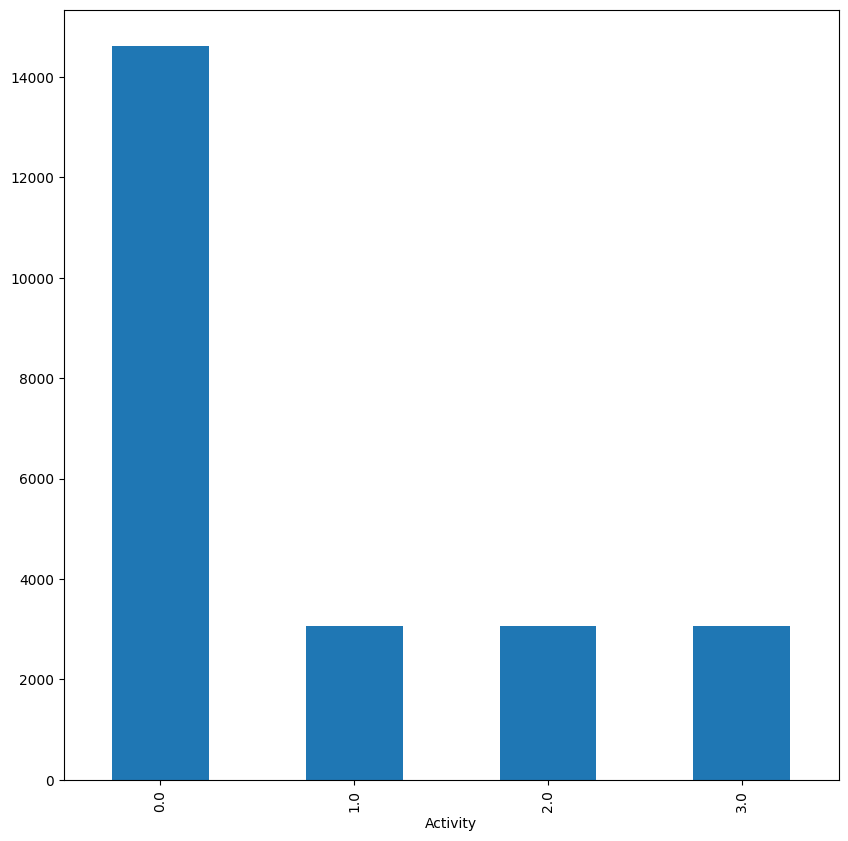

In [ ]:
plt.figure(figsize=(10,10))
df['Activity'].value_counts().plot.bar()
plt.show()

In [ ]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else= df[df['Activity']!=0]

In [ ]:
data_activity_0 = data_activity_0.sample(n=4000)
df=pd.concat([data_activity_0, data_activity_else])

<Axes: xlabel='Activity'>

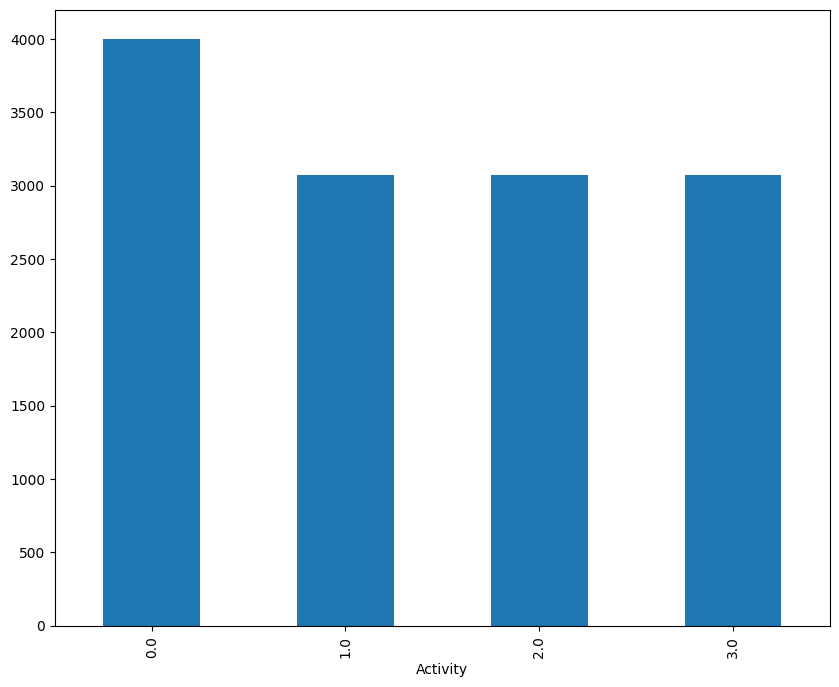

In [ ]:
plt.figure(figsize = (10,8))
df['Activity'].value_counts().plot.bar()

In [ ]:
len(df)


13216

In [ ]:
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)",
}

===============Standing still (1 min) - a===============.


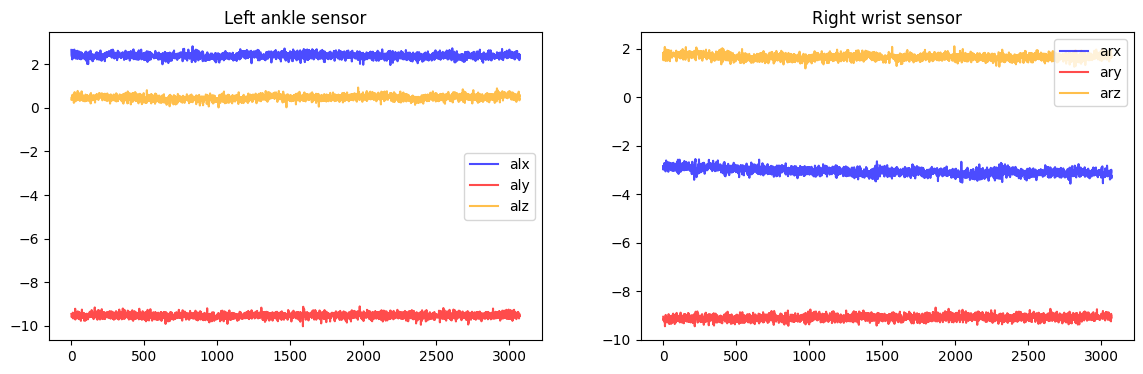

===============Standing still (1 min) - g===============.


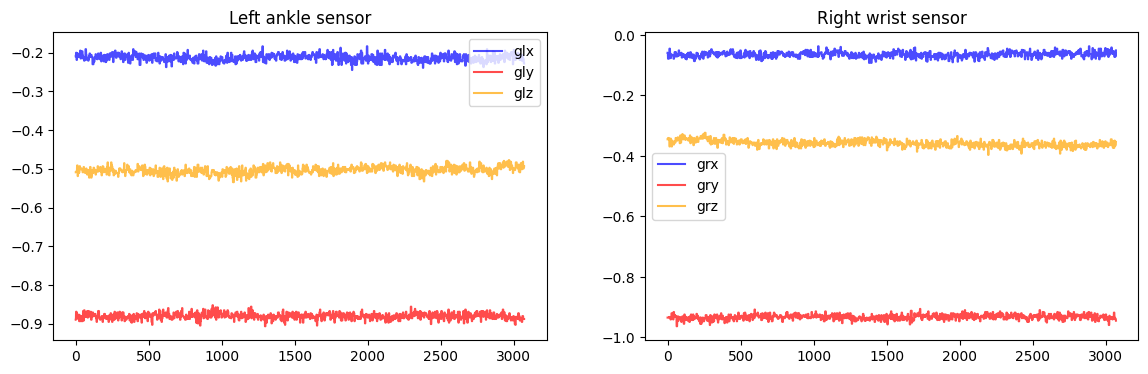

===============Sitting and relaxing (1 min) - a===============.


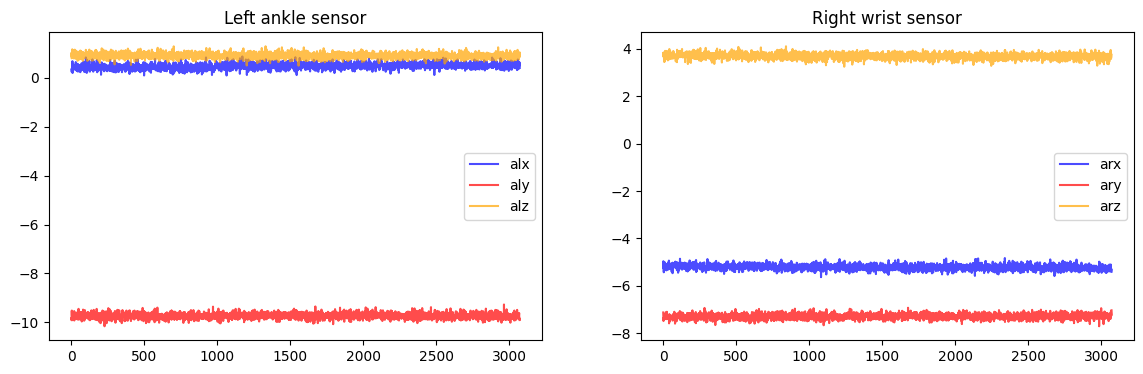

===============Sitting and relaxing (1 min) - g===============.


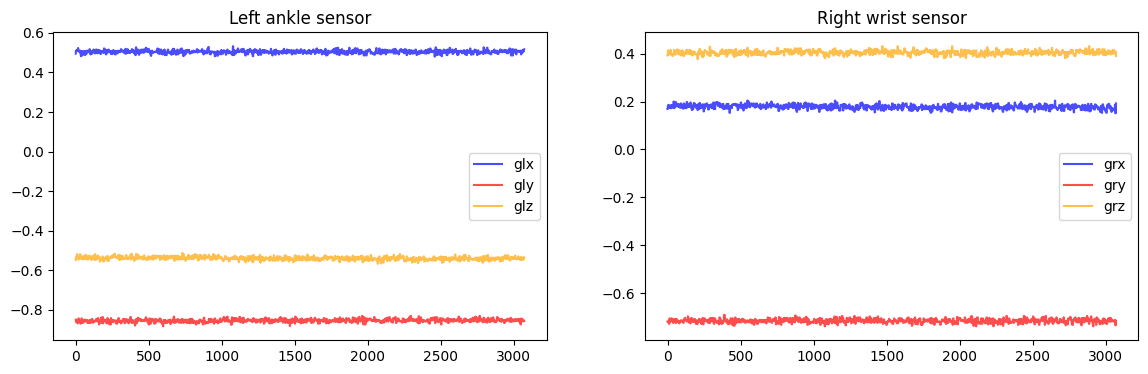

===============Lying down (1 min) - a===============.


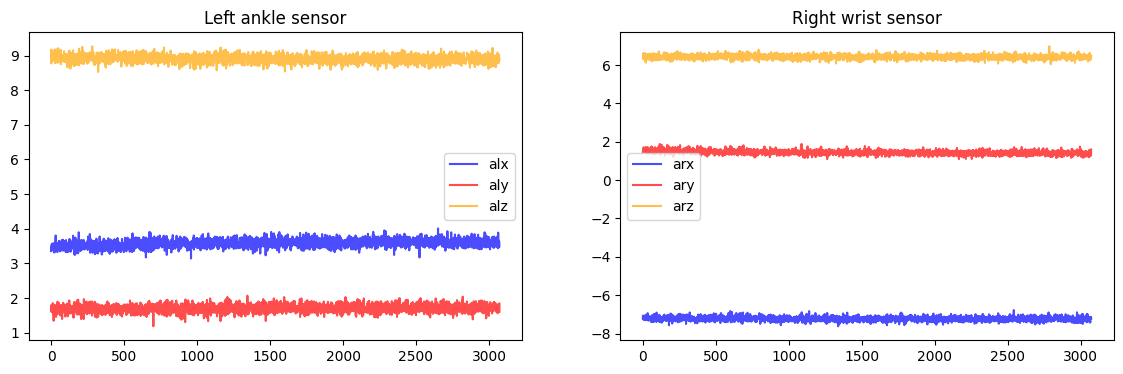

===============Lying down (1 min) - g===============.


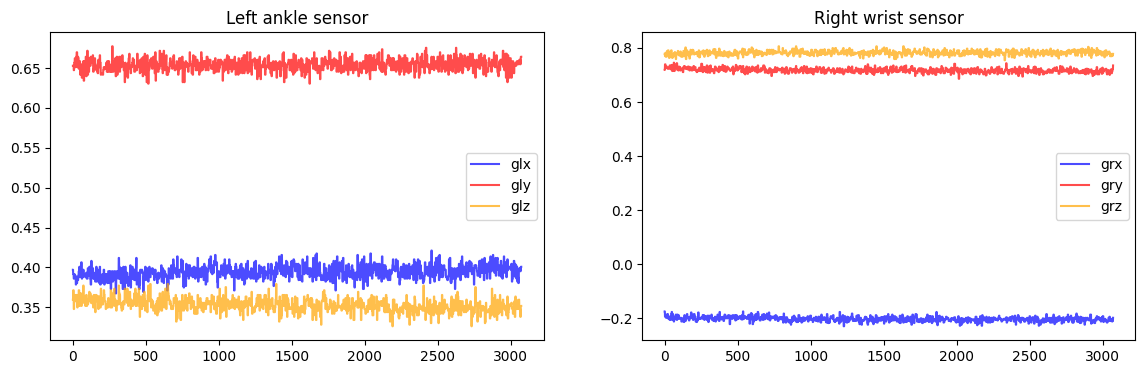

===============Walking (1 min) - a===============.


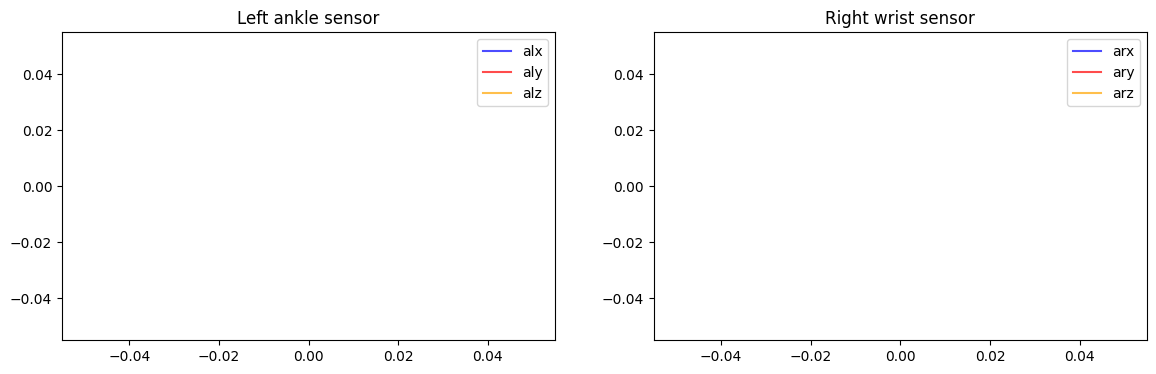

===============Walking (1 min) - g===============.


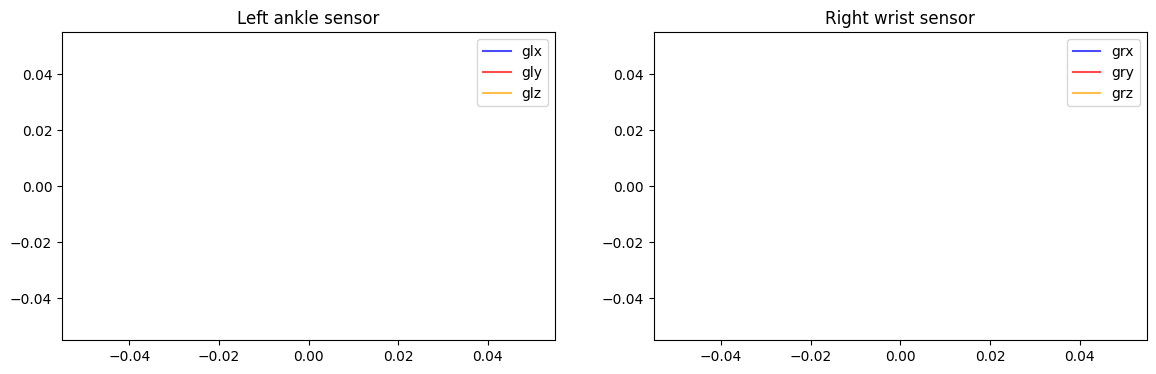

===============Climbing stairs (1 min) - a===============.


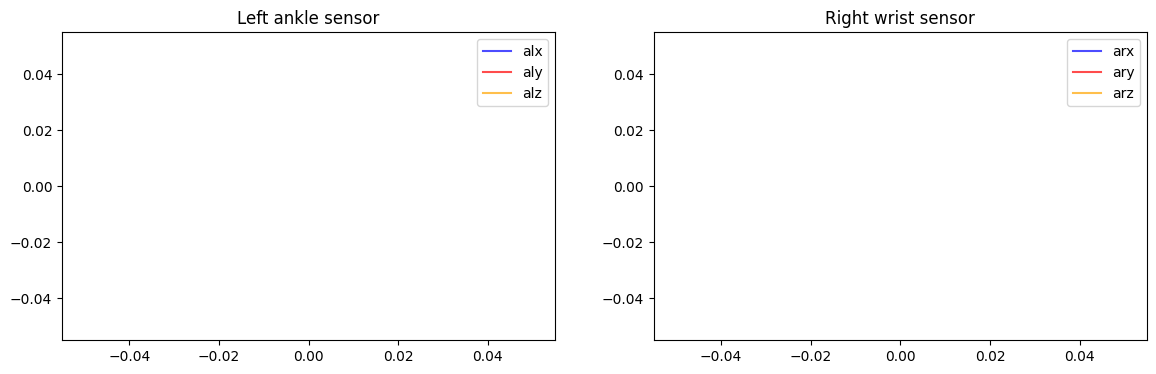

===============Climbing stairs (1 min) - g===============.


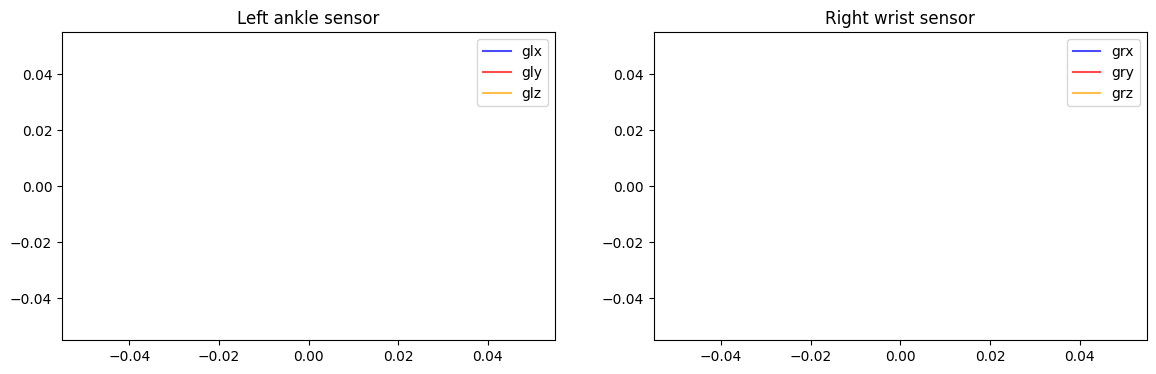

===============Waist bends forward (20x) - a===============.


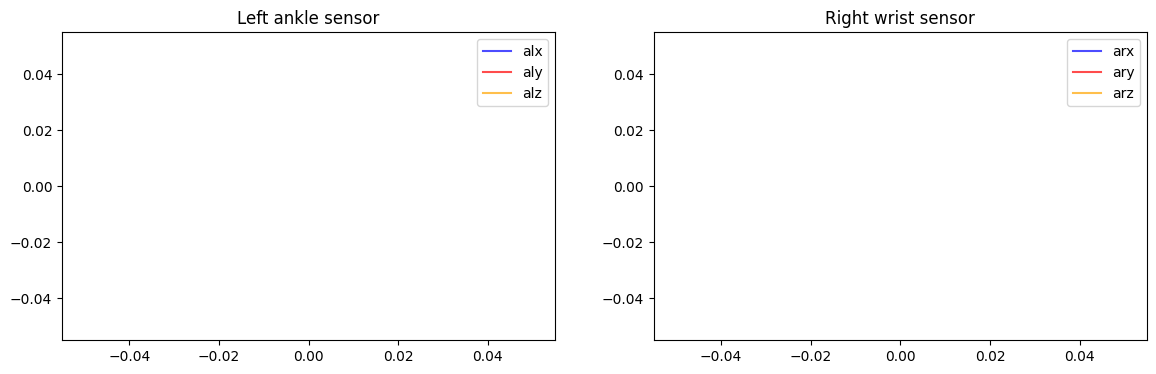

===============Waist bends forward (20x) - g===============.


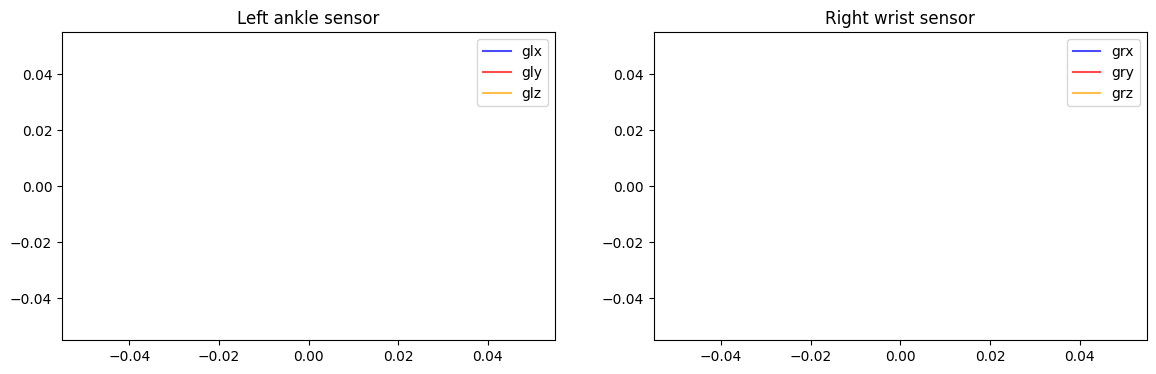

===============Frontal elevation of arms (20x) - a===============.


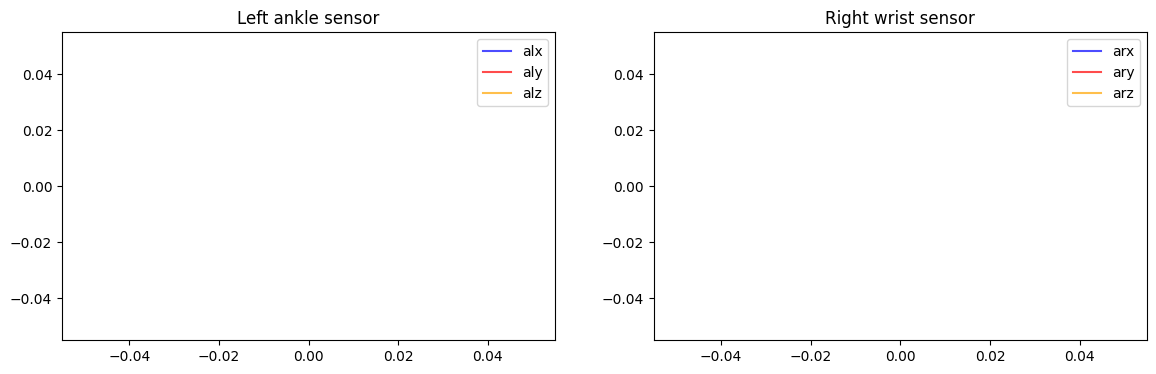

===============Frontal elevation of arms (20x) - g===============.


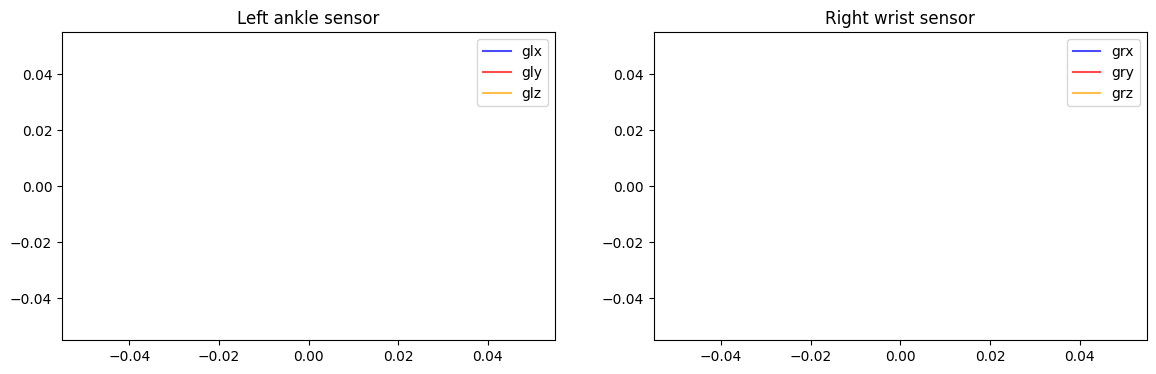

===============Knees bending (crouching) (20x) - a===============.


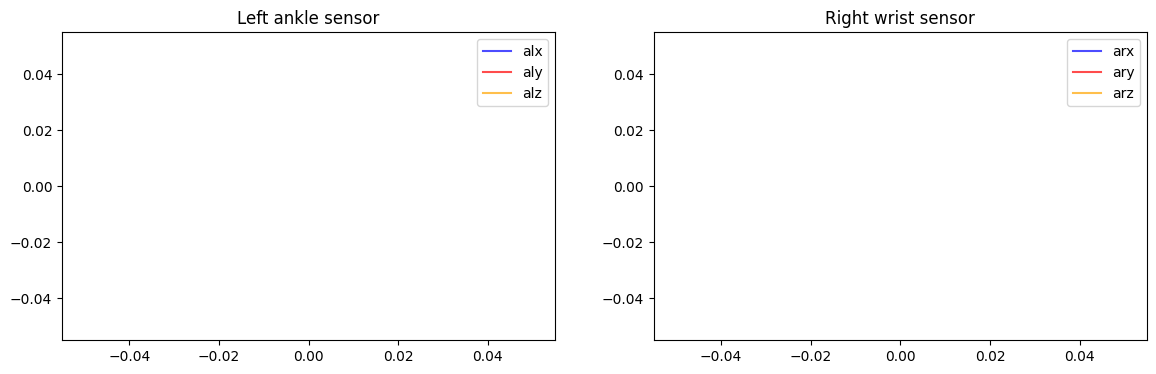

===============Knees bending (crouching) (20x) - g===============.


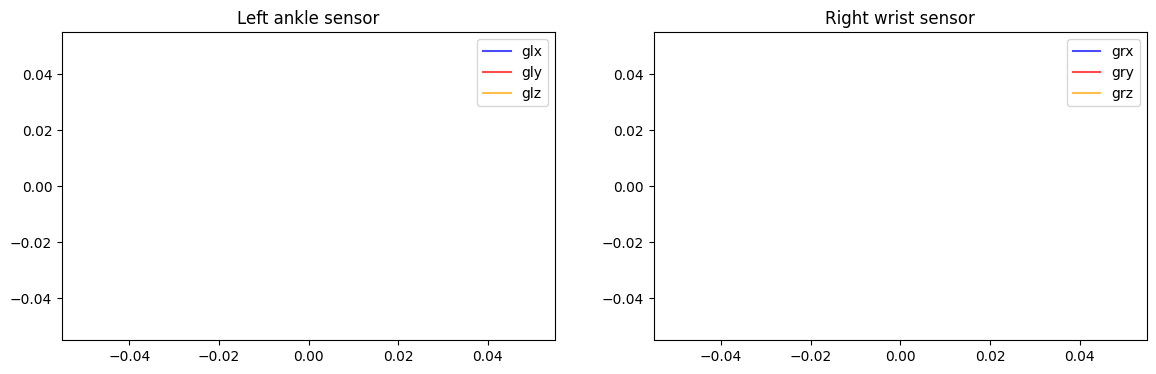

===============Cycling (1 min) - a===============.


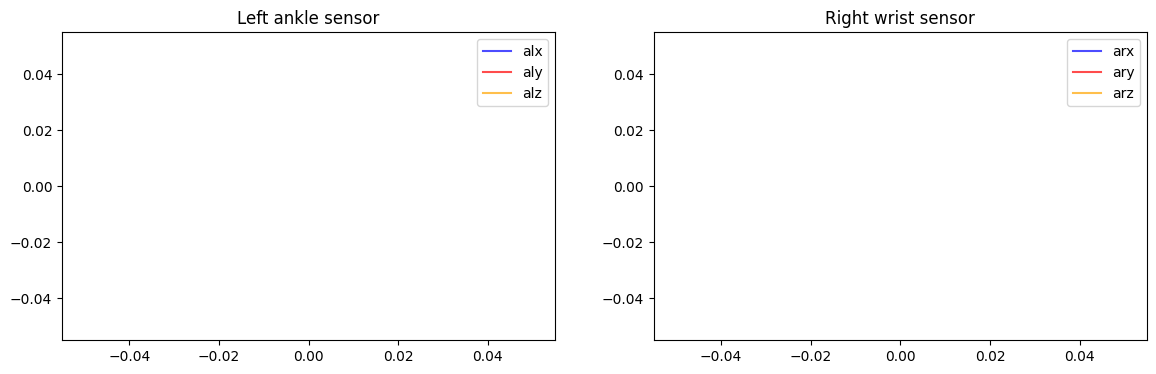

===============Cycling (1 min) - g===============.


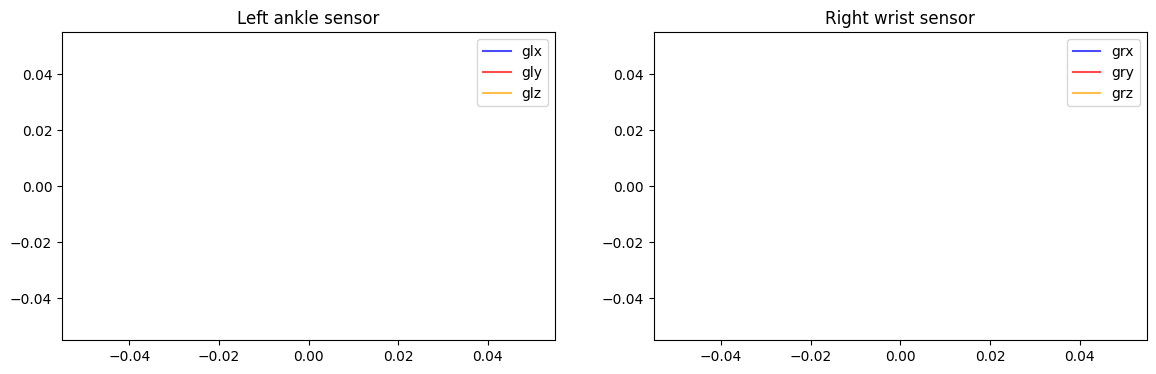

===============Jogging (1 min) - a===============.


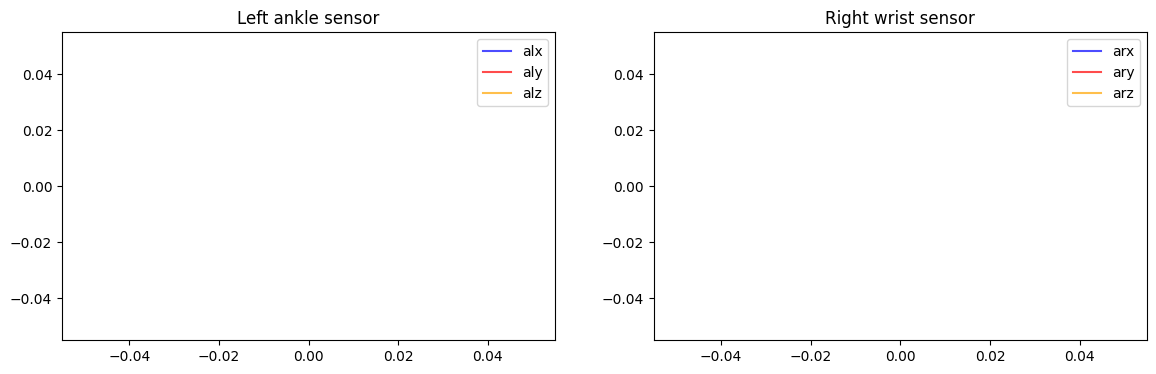

===============Jogging (1 min) - g===============.


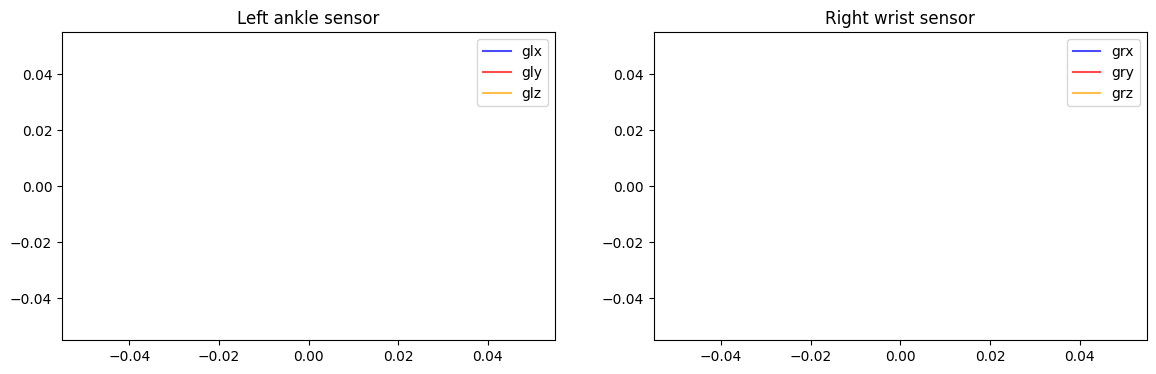

===============Running (1 min) - a===============.


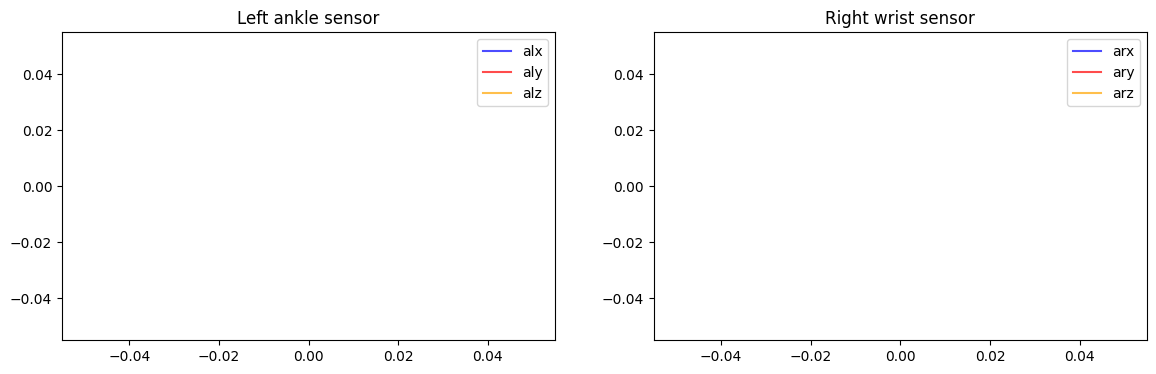

===============Running (1 min) - g===============.


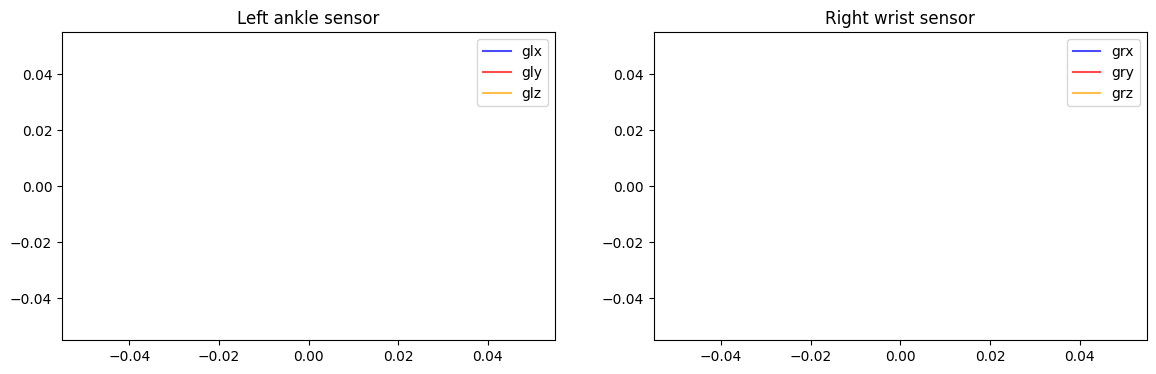

===============Jump front & back (20x) - a===============.


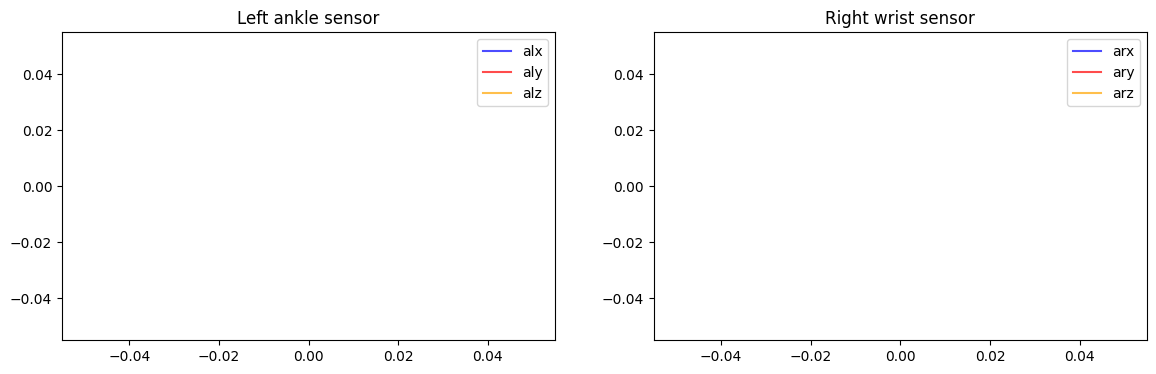

===============Jump front & back (20x) - g===============.


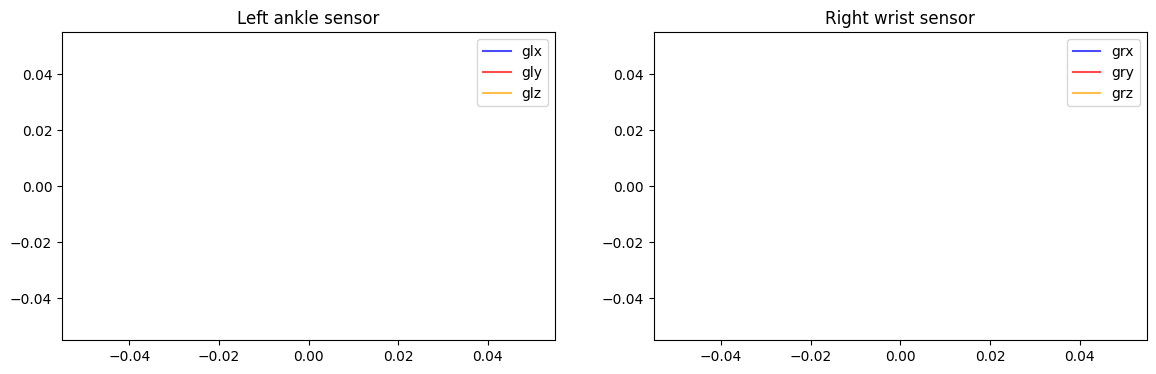

In [ ]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1,13):
    for r in readings:
        print(f"==============={activity_label[i]} - {r}===============.")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"],
                color = 'blue', alpha = 0.7, label = r + "lx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"],
                color = 'red', alpha = 0.7, label = r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"],
                color = 'orange', alpha = 0.7, label = r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"],
                color = 'blue', alpha = 0.7, label = r + "rx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"],
                color = 'red', alpha = 0.7, label = r + "ry")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"],
                color = 'orange', alpha = 0.7, label = r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()